## Library Import
Before we start exploring our dataset, let's import the necessaries library for our EDA. We will use pandas to read in our dataset, perform data manipulation/wrangling, and calculate summary statistics. We will also rely on matplotlib and seaborn to create visualizations.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Add in this line so that we don't need to plt.show() everytime we 
# create a new plot/graph
%matplotlib inline 

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

Let's adjust pandas's display setting so we can see the data frame in full later on.

In [3]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', -1) 

## Overall Admission for UCLA School of Engineering

We will start by exploring the overall admission data for the UCLA. The School of Engineering offered several engineering degrees including Computer Science and others. The admission statistics can be found from this [website]("https://www.seasoasa.ucla.edu/enrollment-degree-statistics-new/"). 

We start by reading in the dataset with pandas's read_excel function.

In [15]:
overall_admit = pd.read_excel("daily bruin CS request - fixed.xlsx", sheet_name=0)

__As we can see below, the dataset is already in a nice, clean, long format. We have 5 variables here;__
1. freshman_transfer: this indicates if the admission data is for freshman or transfer
2. term: we have data from 2000-2017
3. applied: number of students applied to the UCLA School of Engineering 
4. admit: number of students admitted to the UCLA School of Engineering 
5. enroll: number of students choose to enroll in the UCLA School of Engineering 

In [16]:
overall_admit.head()

,freshman_transfer,term,applied,admit,enroll
0,Transfer,00F,10127,3911,2381
1,Transfer,01F,11025,4095,2542
2,Transfer,02F,12189,3867,2404
3,Transfer,03F,13300,5236,3407
4,Transfer,04F,13863,5120,3230


In [17]:
overall_admit.tail()

,freshman_transfer,term,applied,admit,enroll
31,Freshman,13F,80522,16448,5701
32,Freshman,14F,86548,16059,5765
33,Freshman,15F,92728,16016,5680
34,Freshman,16F,97121,17474,6546
35,Freshman,17F,102242,16456,6037


In [18]:
# Since we are going to visualize the admission statitics over the year, it makes sense to add a year column
overall_admit['year'] = list(range(2000,2018)) * 2
del overall_admit['term']

In [19]:
overall_admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
freshman_transfer    36 non-null object
applied              36 non-null int64
admit                36 non-null int64
enroll               36 non-null int64
year                 36 non-null int64
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


In [20]:
overall_admit.describe()

,applied,admit,enroll,year
count,36.000000,36.000000,36.000000,36.000000
mean,39088.111111,9266.083333,4082.444444,2008.500000
std,27554.111060,4536.215373,1093.225384,5.261722
min,10127.000000,3867.000000,2381.000000,2000.000000
25%,16405.250000,5360.000000,3330.500000,2004.000000
50%,30144.500000,7934.000000,3633.000000,2008.500000
75%,55504.750000,12306.000000,4660.750000,2013.000000
max,102242.000000,17474.000000,6546.000000,2017.000000


We can also easily compute __new variables__ from existing one. It would be interesting to visualize the __admission and enrollment rate__ over the years, which are good indicators of how competitive UCLA has became over the year. 

In [54]:
overall_admit['accept_rate'] = overall_admit['admit'] / overall_admit['applied'] * 100
overall_admit['enroll_rate'] = overall_admit['enroll'] / overall_admit['admit'] * 100

In [ ]:
https://dailybruin.com/2017/12/14/ucla-breaks-its-own-record-sees-increase-in-freshman-applicants/
https://www.washingtonpost.com/news/grade-point/wp/2016/12/19/ucla-is-the-first-school-to-receive-100000-freshman-applications/?utm_term=.40a14a0f8ebd

Text(0,0.5,'Number of Applications')

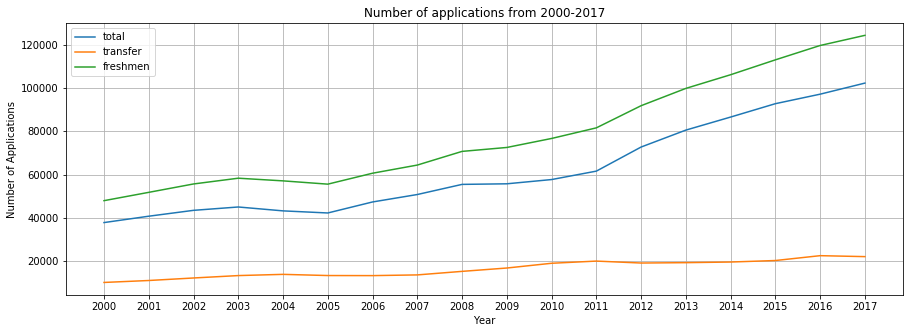

In [23]:
applied_pivot_ft = overall_admit.pivot_table(index = 'year', columns = 'freshman_transfer', values = 'applied', aggfunc = 'sum')
applied_pivot = overall_admit.pivot_table(index = 'year', values = 'applied', aggfunc = 'sum')

ax = applied_pivot_ft.plot(xticks = list(range(2000,2018)),
                           figsize=(15,5), 
                           grid=True,
                           title = "Number of applications from 2000-2017")
applied_pivot.plot(ax=ax,
                   xticks = list(range(2000,2018)),
                   figsize=(15,5), 
                   grid=True,)
ax.legend(["total", "transfer", "freshmen"])
ax.set_xlabel("Year")
ax.set_ylabel("Number of Applications")


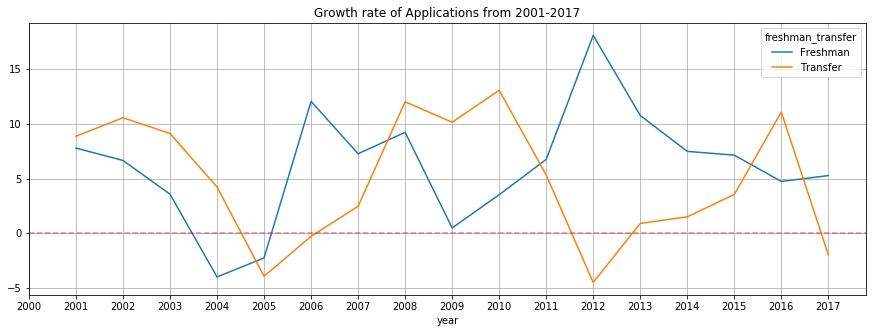

In [52]:
growth_ft = applied_pivot_ft.rolling(2).apply(lambda x: (x[1]/ x[0] -1) * 100, raw = True)
ax = growth_ft.plot(xticks = list(range(2000,2018)),
                           figsize=(15,5), 
                           grid=True,
                           title = "Growth rate of Applications from 2001-2017")

ax.axhline(y = 0, ls = "dashed", alpha = 0.5, color = "red")

In [41]:
# Average growth rate 
growth_ft.apply(np.mean)

freshman_transfer
Freshman    6.150477
Transfer    4.833700
dtype: float64

In [53]:
# Total growth rate from 2000 to 2017
applied_pivot_ft.rolling(18).apply(lambda x: (x[-1]/ x[0] -1) * 100, raw = True).loc[2017,:]

freshman_transfer
Freshman    170.545897
Transfer    117.813765
Name: 2017, dtype: float64

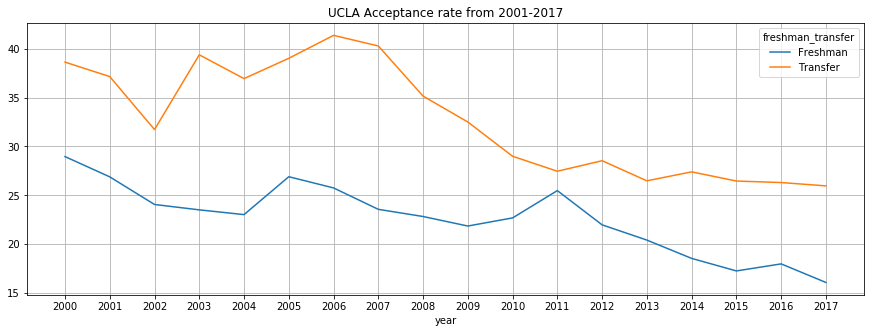

In [58]:
acceptance_ft = overall_admit.pivot_table(index = "year", columns = "freshman_transfer", values = "accept_rate")
acceptance_ft.plot(xticks = list(range(2000,2018)),
                           figsize=(15,5), 
                           grid=True,
                           title = "UCLA Acceptance rate from 2001-2017")

## Admission for CS and CSE courses

In [59]:
## Steps taken to clean the initial dataset and produce the cleaned dataset named cs_admit.csv

# cs_admit = pd.read_excel("CS admissions.xlsx", sheet_name=0)
# cs_admit = cs_admit.iloc[2:,:]
# cse = cs_admit.iloc[24:,:]
# cs_admit = cs_admit.iloc[:19,:]
# cs_admit = cs_admit.reset_index(drop=True)
# cs_freshmen = cs_admit.iloc[:,:4]
# cs_transfer = cs_admit.iloc[:,[0,4,5,6]]
# cse = cse.reset_index(drop=True)
# cse_freshmen = cse.iloc[:,:4]
# cse_transfer = cse.iloc[:,[0,4,5,6]]

# cs_freshmen["freshmen_transfer"] = "freshmen"
# cs_freshmen["course"] = "CS"
# cs_transfer["freshmen_transfer"] = "transfer"
# cs_transfer["course"] = "CS"

# cse_freshmen["freshmen_transfer"] = "freshmen"
# cse_freshmen["course"] = "CSE"
# cse_transfer["freshmen_transfer"] = "transfer"
# cse_transfer["course"] = "CSE"

# cs_freshmen.columns = ['year', "app", "admit", "enrolled", "freshmen_transfer", "course"]
# cs_transfer.columns = ['year', "app", "admit", "enrolled", "freshmen_transfer", "course"]
# cse_freshmen.columns = ['year', "app", "admit", "enrolled", "freshmen_transfer", "course"]
# cse_transfer.columns = ['year', "app", "admit", "enrolled", "freshmen_transfer", "course"]

# cs_admit = pd.concat([cs_freshmen, cs_transfer, cse_freshmen, cse_transfer])
# cs_admit = cs_admit.reset_index(drop=True)
# cs_admit.to_csv("cs_admit.csv", index=False)

In [60]:
cs_admit = pd.read_csv("cs_admit.csv")

In [61]:
cs_admit['accept_rate'] = cs_admit['admit'] / cs_admit['app'] * 100
cs_admit['enroll_rate'] = cs_admit['app'] / cs_admit['enrolled'] * 100

In [62]:
cs_admit

,year,app,admit,enrolled,freshmen_transfer,course,accept_rate,enroll_rate
0,2000,1522,164,47,freshmen,CS,10.775296,3238.297872
1,2001,1873,128,30,freshmen,CS,6.833956,6243.333333
2,2002,1207,152,37,freshmen,CS,12.593206,3262.162162
3,2003,946,142,48,freshmen,CS,15.010571,1970.833333
4,2004,611,138,43,freshmen,CS,22.585925,1420.930233
5,2005,518,107,31,freshmen,CS,20.656371,1670.967742
6,2006,539,123,38,freshmen,CS,22.820037,1418.421053
7,2007,603,155,71,freshmen,CS,25.704809,849.295775
8,2008,720,188,57,freshmen,CS,26.111111,1263.157895
9,2009,740,186,50,freshmen,CS,25.135135,1480.000000


Text(0,0.5,'Number of applications')

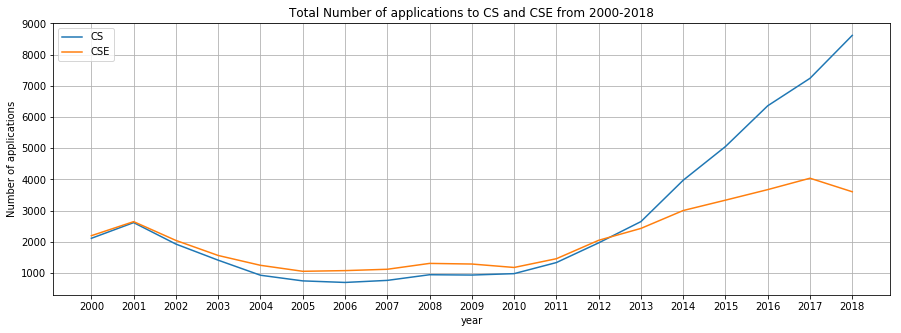

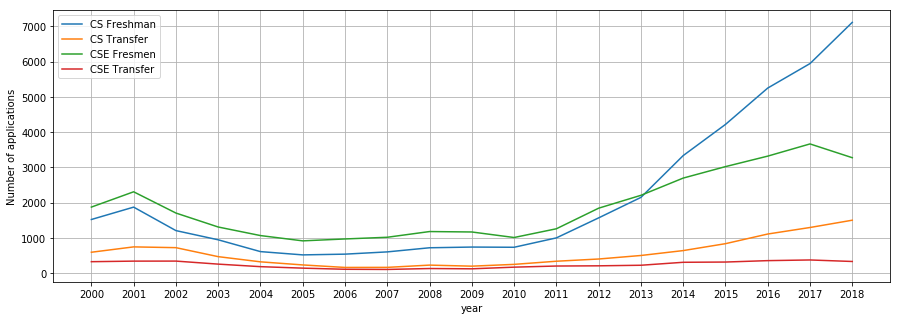

In [82]:
pivot_total = cs_admit.pivot_table(index = "year", columns = "course", values= "app", aggfunc=sum)
ax_total = pivot_total.plot(xticks = list(range(2000,2019)),
                        figsize=(15,5), grid = True,
                     title="Total Number of applications to CS and CSE from 2000-2018")
ax_total.legend(["CS", "CSE"])
ax_total.set_ylabel("Number of applications")

pivot_ft = cs_admit.pivot_table(index = "year", columns = ["course", "freshmen_transfer"], values= "app")
ax_ft = pivot_ft.plot(xticks = list(range(2000,2019)),
                        figsize=(15,5), grid = True)
ax_ft.legend(["CS Freshman", "CS Transfer", "CSE Fresmen",  "CSE Transfer",])
ax_ft.set_ylabel("Number of applications")

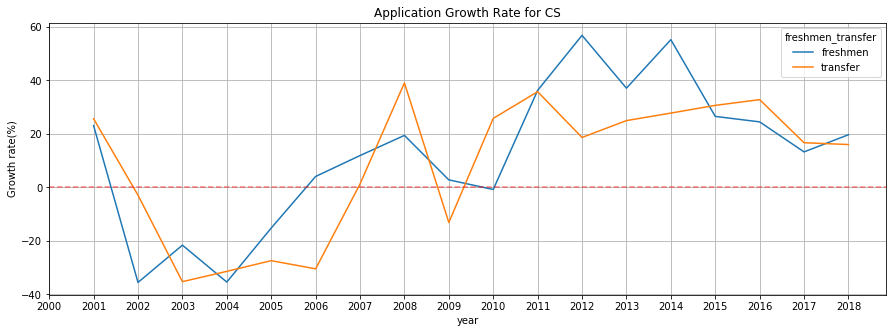

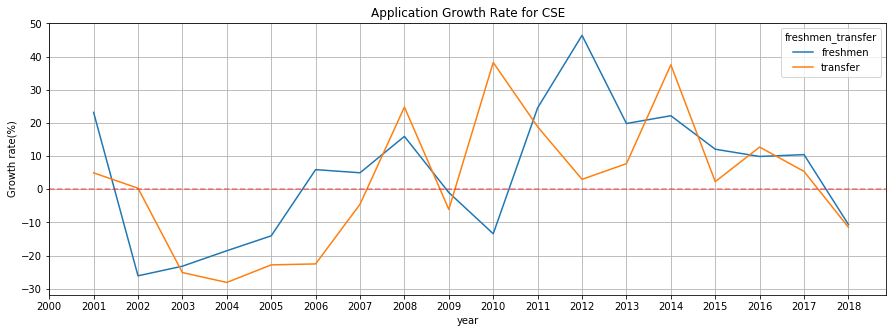

In [88]:
growth_ft = pivot_ft.rolling(2).apply(lambda x: (x[1]/x[0] - 1)*100, raw = True)
ax_cs = growth_ft.CS.plot(xticks = list(range(2000,2019)),
                        figsize=(15,5), grid = True,
                         title = "Application Growth Rate for CS")
# ax_ft.legend(["CS Freshman", "CSE Fresmen", "CS Transfer", "CSE Transfer",])
ax_cs.set_ylabel("Growth rate(%)")
ax_cs.axhline(y = 0, ls = "dashed", alpha = 0.5, color = "red")

ax_cse = growth_ft.CSE.plot(xticks = list(range(2000,2019)),
                        figsize=(15,5), grid = True,
                         title = "Application Growth Rate for CSE")
# ax_ft.legend(["CS Freshman", "CSE Fresmen", "CS Transfer", "CSE Transfer",])
ax_cse.set_ylabel("Growth rate(%)")
ax_cse.axhline(y = 0, ls = "dashed", alpha = 0.5, color = "red")

In [89]:
growth_ft.apply(np.mean)

course  freshmen_transfer
CS      freshmen             12.316099
        transfer             8.560396 
CSE     freshmen             4.889180 
        transfer             1.928714 
dtype: float64

In [91]:
pivot_ft.rolling(19).apply(lambda x: (x[-1]/ x[0] -1) * 100, raw = True).loc[2018,:]

course  freshmen_transfer
CS      freshmen             367.477004
        transfer             153.288364
CSE     freshmen             74.759872 
        transfer             1.846154  
Name: 2018, dtype: float64

Text(0,0.5,'Accpetance rate(%)')

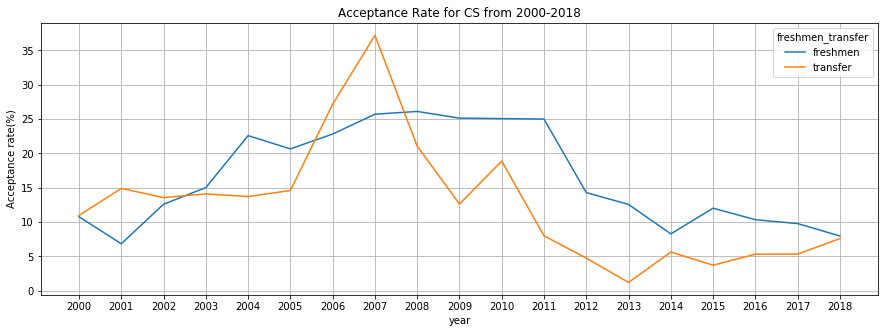

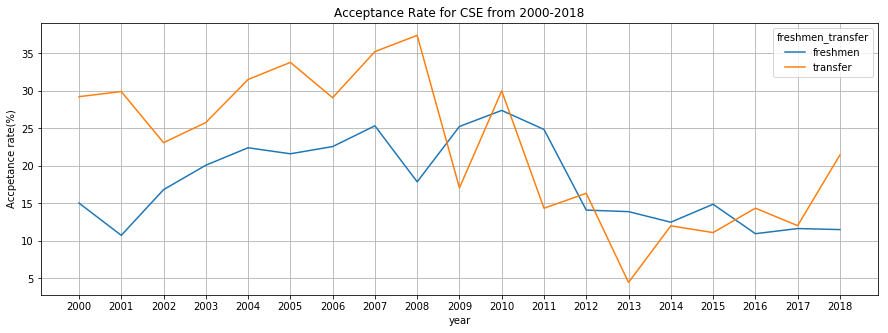

In [97]:
accept_ft = cs_admit.pivot_table(index= "year", columns = ["course", "freshmen_transfer"], values = "accept_rate")

ax_cs = accept_ft.CS.plot(xticks = list(range(2000,2019)),
                        figsize=(15,5), grid = True,
                         title = "Acceptance Rate for CS from 2000-2018")
ax_cs.set_ylabel("Acceptance rate(%)")

ax_cse = accept_ft.CSE.plot(xticks = list(range(2000,2019)),
                        figsize=(15,5), grid = True,
                         title = "Acceptance Rate for CSE from 2000-2018")
ax_cse.set_ylabel("Accpetance rate(%)")

## CS Course Enrollment

In [4]:
course_enrollment = pd.read_excel("daily bruin CS request - fixed.xlsx", sheet_name=2)

In [5]:
course_enrollment.head()

,term,subj_area,catlg_no,sect_no,section_type,enrollment
0,09F,COM SCI,0001,001,Primary,107
1,09F,COM SCI,0001,001A,Secondary,69
2,09F,COM SCI,0001,001B,Secondary,38
3,09F,COM SCI,0031,001,Primary,88
4,09F,COM SCI,0031,001A,Secondary,30


In [6]:
ce_lecture = course_enrollment[course_enrollment['section_type'] == "Primary"]

In [7]:
del ce_lecture['section_type']

In [8]:
ce_lecture_string = ce_lecture.select_dtypes("object")
ce_lecture[ce_lecture_string.columns] = ce_lecture_string.apply(lambda x: x.str.strip())

C:\Users\Ung Lik Teng\Anaconda3\envs\stack\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [9]:
ce_lecture = ce_lecture.reset_index(drop=True)

In [10]:
ce_lecture.head()

,term,subj_area,catlg_no,sect_no,enrollment
0,09F,COM SCI,0001,001,107
1,09F,COM SCI,0031,001,88
2,09F,COM SCI,0031,002,91
3,09F,COM SCI,0031,003,134
4,09F,COM SCI,0033,001,56


In [11]:
ce_lecture.dtypes

term          object
subj_area     object
catlg_no      object
sect_no       object
enrollment    int64 
dtype: object

In [12]:
ce_lecture["year"] = [0] * len(ce_lecture)

In [13]:
for i in range(len(ce_lecture)):
    if(ce_lecture.loc[i, "term"][2] == "F"):
        ce_lecture.loc[i, 'year'] = int(ce_lecture.loc[i, "term"][:-1]) + 2000
    else:
        ce_lecture.loc[i, 'year'] = int(ce_lecture.loc[i, "term"][:-1]) + 2000 - 1


In [24]:
ce_lecture['lower_upper'] = [''] * len(ce_lecture)

In [25]:
for i in range(len(ce_lecture)):
    if ce_lecture.loc[i, "catlg_no"][1] == "0":
        ce_lecture.loc[i, "lower_upper"] = "lower"
    elif ce_lecture.loc[i, "catlg_no"][1] == "1":
        ce_lecture.loc[i, "lower_upper"] = "upper"
    else:
        ce_lecture.loc[i, "lower_upper"] = "graduate"    

In [176]:
research_other = ["0099", "0199", "0194", '0187  CM','0185  M', "0188SA", "0188SB", "0188SC"]


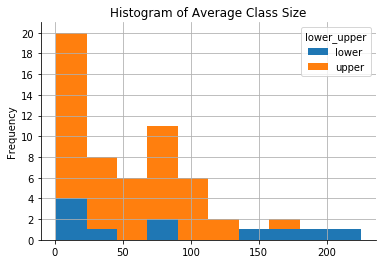

In [164]:
avg_class_size = ce_lecture.pivot_table(index = "catlg_no", columns = "lower_upper", values= "enrollment", aggfunc="mean")
ax = avg_class_size[["lower","upper"]].plot.hist(title="Histogram of Average Class Size", stacked = True, grid=True)
ax.set_yticks(np.arange(0,22,2))
plt.gca().spines["top"].set_visible(False)  
plt.gca().spines["right"].set_visible(False)

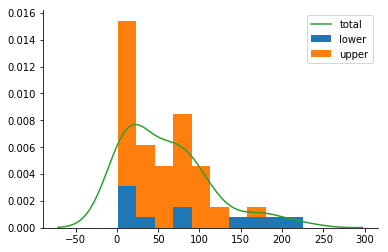

In [85]:
avg_cs_l = ce_lecture[ce_lecture["lower_upper"] =="lower"].pivot_table(index = "catlg_no", values= "enrollment", aggfunc="mean")
avg_cs_u = ce_lecture[ce_lecture["lower_upper"] =="upper"].pivot_table(index = "catlg_no", values= "enrollment", aggfunc="mean")
avg_cs_lu= ce_lecture[ce_lecture["lower_upper"] != "graduate"].pivot_table(index = "catlg_no", values= "enrollment", aggfunc="mean")

plt.hist([avg_cs_l.enrollment,avg_cs_u.enrollment], stacked= True, density = True)
sns.kdeplot(avg_cs_lu.enrollment)
plt.legend(["total", "lower", "upper"])
plt.gca().spines["top"].set_visible(False)  
plt.gca().spines["right"].set_visible(False)

In [92]:
ce_lecture.head()

,term,subj_area,catlg_no,sect_no,enrollment,year,lower_upper
0,09F,COM SCI,0001,001,107,2009,lower
1,09F,COM SCI,0031,001,88,2009,lower
2,09F,COM SCI,0031,002,91,2009,lower
3,09F,COM SCI,0031,003,134,2009,lower
4,09F,COM SCI,0033,001,56,2009,lower


[Text(0,0,'09F'),
 Text(0,0,'10F'),
 Text(0,0,'10S'),
 Text(0,0,'10W'),
 Text(0,0,'11F'),
 Text(0,0,'11S'),
 Text(0,0,'11W'),
 Text(0,0,'12F'),
 Text(0,0,'12S'),
 Text(0,0,'12W'),
 Text(0,0,'13F'),
 Text(0,0,'13S'),
 Text(0,0,'13W'),
 Text(0,0,'14F'),
 Text(0,0,'14S'),
 Text(0,0,'14W'),
 Text(0,0,'15F'),
 Text(0,0,'15S'),
 Text(0,0,'15W'),
 Text(0,0,'16F'),
 Text(0,0,'16S'),
 Text(0,0,'16W'),
 Text(0,0,'17F'),
 Text(0,0,'17S'),
 Text(0,0,'17W'),
 Text(0,0,'18S'),
 Text(0,0,'18W')]

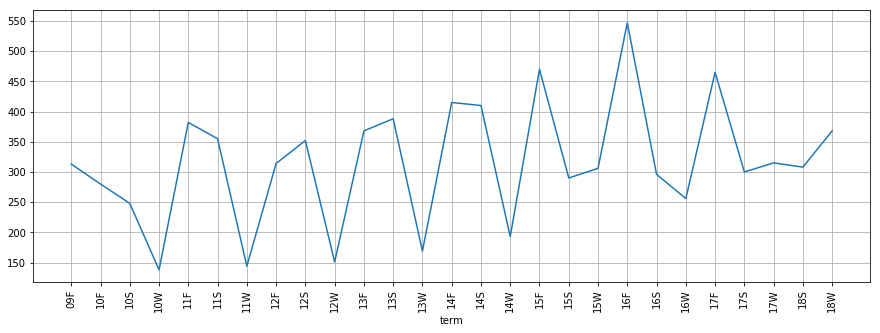

In [111]:
## Course by term isn't really meaningful.
course_by_term = ce_lecture.pivot_table(index = "term", columns = "catlg_no", values= "enrollment", aggfunc="sum")
ax = course_by_term['0031'].plot(figsize = (15,5), grid = True)
ax.set_xticks(range(len(course_by_term.index)))
ax.set_xticklabels(ce_lecture.term.unique().tolist(), rotation ='vertical')


In [ ]:
course_by_year = ce_lecture.pivot_table(index = "year", columns = ["lower_upper", "catlg_no"], values= "enrollment", aggfunc=["sum","count","mean"])

ax_sum = course_by_year['sum'].lower.plot(figsize=(10,5), grid=True, title="Total Enrollment of CS Class from 2009-2017")
ax_sum.legend(bbox_to_anchor=(1.05, 0.85), fancybox=True, shadow=True)

ax_count = course_by_year['count'].lower.plot(figsize=(10,10), grid=True, title="Number of CS Class from 2009-2017")
ax_count.legend(bbox_to_anchor=(1.2, 0.85), fancybox=True, shadow=True)
ax_count.set_yticks(range(22))

ax_mean = course_by_year['mean'].lower.plot(figsize=(10,5), grid=True, title="CS Class size from 2009-2017 " )
ax_mean.legend(bbox_to_anchor=(1.05, 0.85), fancybox=True, shadow=True)

ax_sum = course_by_year['sum'].upper.plot(figsize=(10,5), grid=True, title="Total Enrollment of CS Class from 2009-2017")
ax_sum.legend(bbox_to_anchor=(1.05, 0.85), fancybox=True, shadow=True)

ax_count = course_by_year['count'].upper.plot(figsize=(10,10), grid=True, title="Number of CS Class from 2009-2017")
ax_count.legend(bbox_to_anchor=(1.2, 0.85), fancybox=True, shadow=True)
ax_count.set_yticks(range(22))

ax_mean = course_by_year['mean'].upper.plot(figsize=(10,5), grid=True, title="CS Class size from 2009-2017 " )
ax_mean.legend(bbox_to_anchor=(1.05, 0.85), fancybox=True, shadow=True)

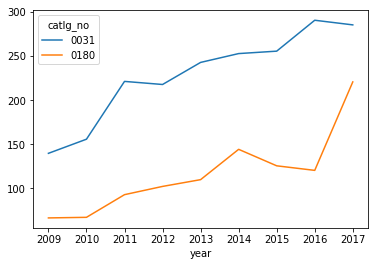

In [182]:
course_by_year = ce_lecture.pivot_table(index = "year", columns = "catlg_no", values= "enrollment", aggfunc="mean")
course_by_year[['0031', '0180']].plot()

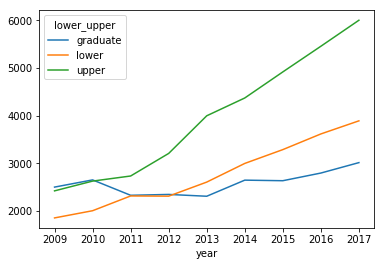

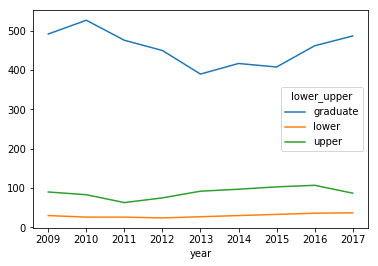

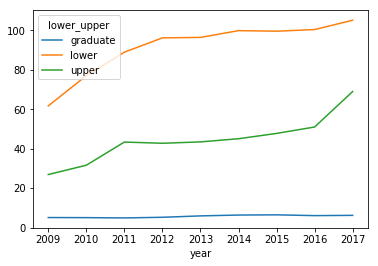

In [154]:
course_by_year = ce_lecture.pivot_table(index = "year", columns="lower_upper", values= "enrollment", aggfunc=["sum", "count","mean"])
course_by_year["sum"].plot()
course_by_year["count"].plot()
course_by_year["mean"].plot()
